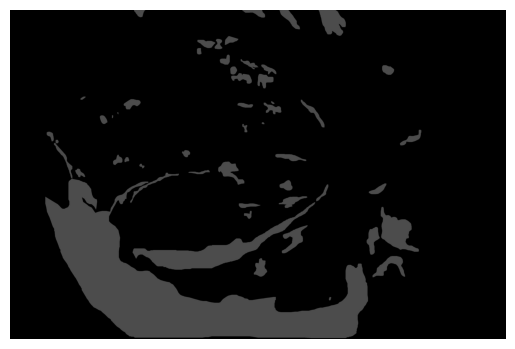

C shape
6649
Area 4732.5
4732.5


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

imagem = cv.imread('/content/Teste/IDRiD_17_HE.jpg', 0)

# Converter a imagem de BGR para RGB (OpenCV carrega imagens em formato BGR)
imagem_rgb = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)

contours,hierarchy = cv.findContours(imagem, 1, 2)

cnt = contours[-1]
area = cv.contourArea(cnt)

# Exibir a imagem usando matplotlib
plt.imshow(imagem_rgb)
plt.axis('off')  # Desativar os eixos
plt.show()

print("C shape")
print(len(contours))
print("Area" + " " + str(area))
print(area)

In [5]:
#tratando classificação
import pandas as pd

address = '/content/full_grading.txt'
Colunas = ['imagem']


text = pd.read_csv(address, names=Colunas)

text[['imagem', 'grau']] = text['imagem'].str.split(' ', expand=True)

text

,imagem,grau
0,20170413102628830.jpg,0
1,20170413111955404.jpg,0
2,20170413112015395.jpg,0
3,20170413112017305.jpg,0
4,20170413112528859.jpg,0
...,...,...
13668,007-8436-603.jpg,5
13669,007-8437-603.jpg,5
13670,007-8439-603.jpg,5
13671,007-8440-603.jpg,5


In [6]:
#salvar data
text.to_csv('data.csv', index=False)

In [38]:
#separar o que tem segmentação
import os

fileInput = pd.read_csv('data.csv')
FolderAdress = '/content/Imagens/'

imagens = os.listdir(FolderAdress)

dataL = ['imagem', 'grau']
NewData = pd.DataFrame(columns=dataL)

NewData

,imagem,grau


In [33]:
# fileInput.imagem[0]
# fileInput.imagem.size
# sx = [fileInput.imagem == imagens[0]]
sx = fileInput[fileInput['imagem'] == imagens[0]]

sx

,imagem,grau
12671,007-5312-300.jpg,2


In [39]:
for cam in imagens:
  sx = fileInput[fileInput['imagem'] == cam]
  NewData = pd.concat([sx, NewData], ignore_index=True)

NewData.to_csv('TrainData.csv', index=False)
NewData

,imagem,grau
0,007-5395-300.jpg,2
1,007-3499-200.jpg,2
2,007-2765-100.jpg,2
3,007-2167-100.jpg,1
4,007-5396-300.jpg,2
...,...,...
378,007-3425-200.jpg,2
379,007-3928-200.jpg,2
380,007-3412-200.jpg,2
381,007-4319-200.jpg,2
